In [1]:
# 라이브러리 모음
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.graph_objects as go
import plotly.express as px

# 모듈 모음
import modules as mds

In [17]:
# 누적 설비용량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total = pd.read_excel("dataset/지역별_누적_설비용량.xlsx")
data_2024 = pd.read_excel("dataset/2024년도_신규_설비용량.xlsx")
data_2023 = pd.read_excel("dataset/2023년도_신규_설비용량.xlsx")
data_2022 = pd.read_excel("dataset/2022년도_신규_설비용량.xlsx")
data_2021 = pd.read_excel("dataset/2021년도_신규_설비용량.xlsx")

# 데이터프레임으로 변환
# ic = Installed Capacity = 설비용량
ic_total = pd.DataFrame(data_total)
ic_2024 = pd.DataFrame(data_2024)
ic_2023 = pd.DataFrame(data_2023)
ic_2022 = pd.DataFrame(data_2022)
ic_2021 = pd.DataFrame(data_2021)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(ic_total)
mds.delete_comma(ic_2024)
mds.delete_comma(ic_2023)
mds.delete_comma(ic_2022)
mds.delete_comma(ic_2021)

# 컴럼 통일화를 위해 capacity_total에 "합계" 컬럼 추가
ic_total["합계"] = ic_total.sum(axis=1, numeric_only=True)

# 하나의 DataFrame으로 병합
ic_total = pd.concat([ic_total, ic_2024, ic_2023, ic_2022, ic_2021], ignore_index=True)

# 각 연도별 누적값 계산
for i in range(1, len(ic_total)):
    ic_total.iloc[i, 1:] = ic_total.iloc[i-1, 1:] - ic_total.iloc[i, 1:]

# 연도 정리
ic_total.rename(columns={"Unnamed: 0": "연도"}, inplace=True)
ic_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 오름차순 정렬 (주석 처리 시 내림차순)
# ic_total.sort_values(by="연도", inplace=True)
# ic_total.reset_index(drop=True, inplace=True)

# 2020~2024 각 연도의 지역별 누적 설비용량
ic_total.head()

ic_total.to_excel("dataset/지역별_연도별_설비용량.xlsx", index=False, engine="openpyxl")


In [9]:
# 누적 발전량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total_2022 = pd.read_excel("dataset/지역별_누적_발전량.xlsx")
data_2024 = pd.read_excel("dataset/2024년_신규_발전량.xlsx")
data_2023 = pd.read_excel("dataset/2023년_신규_발전량.xlsx")
data_2022 = pd.read_excel("dataset/2022년_신규_발전량.xlsx")
data_2021 = pd.read_excel("dataset/2021년_신규_발전량.xlsx")

# 데이터프레임으로 변환
# gen = Power Generation = 발전량
gen_total_2022 = pd.DataFrame(data_total_2022)
gen_2024 = pd.DataFrame(data_2024)
gen_2023 = pd.DataFrame(data_2023)
gen_2022 = pd.DataFrame(data_2022)
gen_2021 = pd.DataFrame(data_2021)

# 열과 행 전치
gen_2024 = gen_2024.T.reset_index(drop=True)
gen_2023 = gen_2023.T.reset_index(drop=True)
gen_2022 = gen_2022.T.reset_index(drop=True)
gen_2021 = gen_2021.T.reset_index(drop=True)

# 컴럼 정리
gen_2024.columns = gen_2024.iloc[0]
gen_2024.drop(labels=gen_2024.index[0], axis=0, inplace=True)
gen_2023.columns = gen_2023.iloc[0]
gen_2023.drop(labels=gen_2023.index[0], axis=0, inplace=True)
gen_2022.columns = gen_2022.iloc[0]
gen_2022.drop(labels=gen_2022.index[0], axis=0, inplace=True)
gen_2021.columns = gen_2021.iloc[0]
gen_2021.drop(labels=gen_2021.index[0], axis=0, inplace=True)


# 연도 컬럼 추가
gen_2024.insert(0, "연도", np.nan)
gen_2023.insert(0, "연도", np.nan)
gen_2022.insert(0, "연도", np.nan)
gen_2021.insert(0, "연도", np.nan)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(gen_total_2022)
mds.delete_comma(gen_2024)
mds.delete_comma(gen_2023)
mds.delete_comma(gen_2022)
mds.delete_comma(gen_2021)

# 월별 데이터 연도별 데이터로 변환
gen_2024 = pd.DataFrame(gen_2024.sum()).T
gen_2023 = pd.DataFrame(gen_2023.sum()).T
gen_2022 = pd.DataFrame(gen_2022.sum()).T
gen_2021 = pd.DataFrame(gen_2021.sum()).T

# "합계" 컬럼 추가
gen_2024["합계"] = gen_2024.sum(axis=1, numeric_only=True)
gen_2023["합계"] = gen_2023.sum(axis=1, numeric_only=True)
gen_2022["합계"] = gen_2022.sum(axis=1, numeric_only=True)
gen_2021["합계"] = gen_2021.sum(axis=1, numeric_only=True)

# # 하나의 DataFrame으로 병합
gen_total = pd.concat([gen_2024, gen_2023, gen_total_2022, gen_2022, gen_2021], ignore_index=True)

# 연도 정리
gen_total = gen_total.drop(gen_total.columns[-1], axis=1)
gen_total.rename(columns={"지역": "연도"}, inplace=True)
gen_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 소수점 제거
gen_total = gen_total.astype(int)

# # 각 연도별 누적값 계산
gen_total.iloc[1, 1:] = gen_total.iloc[2, 1:] + gen_total.iloc[1, 1:] # 2023 계산
gen_total.iloc[0, 1:] = gen_total.iloc[1, 1:] + gen_total.iloc[0, 1:] # 2024 계산
gen_total.iloc[3, 1:] = gen_total.iloc[2, 1:] - gen_total.iloc[3, 1:] # 2021 계산
gen_total.iloc[4, 1:] = gen_total.iloc[3, 1:] - gen_total.iloc[4, 1:] # 2020 계산


# # 오름차순 정렬 (주석 처리 시 내림차순)
# # gen_total.sort_values(by="연도", inplace=True)
# # gen_total.reset_index(drop=True, inplace=True)

# # 2020~2024 각 연도의 지역별 누적 발전량
gen_total.head()

gen_total.to_excel("dataset/지역별_연도별_발전량.xlsx", index=False, engine="openpyxl")

In [10]:
# 누적 설비용량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total = pd.read_excel("dataset/지역별_누적_설비용량.xlsx")
data_2024 = pd.read_excel("dataset/2024년도_신규_설비용량.xlsx")
data_2023 = pd.read_excel("dataset/2023년도_신규_설비용량.xlsx")
data_2022 = pd.read_excel("dataset/2022년도_신규_설비용량.xlsx")
data_2021 = pd.read_excel("dataset/2021년도_신규_설비용량.xlsx")

# 데이터프레임으로 변환
# ic = Installed Capacity = 설비용량
ic_total = pd.DataFrame(data_total)
ic_2024 = pd.DataFrame(data_2024)
ic_2023 = pd.DataFrame(data_2023)
ic_2022 = pd.DataFrame(data_2022)
ic_2021 = pd.DataFrame(data_2021)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(ic_total)
mds.delete_comma(ic_2024)
mds.delete_comma(ic_2023)
mds.delete_comma(ic_2022)
mds.delete_comma(ic_2021)

# 컴럼 통일화를 위해 capacity_total에 "합계" 컬럼 추가
ic_total["합계"] = ic_total.sum(axis=1, numeric_only=True)

# 하나의 DataFrame으로 병합
ic_total = pd.concat([ic_total, ic_2024, ic_2023, ic_2022, ic_2021], ignore_index=True)

# 각 연도별 누적값 계산
for i in range(1, len(ic_total)):
    ic_total.iloc[i, 1:] = ic_total.iloc[i-1, 1:] - ic_total.iloc[i, 1:]

# 연도 정리
ic_total.rename(columns={"Unnamed: 0": "연도"}, inplace=True)
ic_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 오름차순 정렬 (주석 처리 시 내림차순)
# ic_total.sort_values(by="연도", inplace=True)
# ic_total.reset_index(drop=True, inplace=True)

# 2020~2024 각 연도의 지역별 누적 설비용량
ic_total.head()

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북,합계
0,2024,50,275,420,163,353,65,152,88,2012,1613,3772,6023,3842,2016,621,1943,4590,27998
1,2023,50,234,339,139,303,55,122,78,1672,1408,3072,5410,3324,1745,610,1760,4304,24625
2,2022,48,202,297,124,274,50,99,70,1459,1240,2798,4568,2886,1564,587,1612,3995,21873
3,2021,44,170,265,110,249,46,87,62,1278,1065,2522,3911,2409,1347,549,1408,3357,18879
4,2020,41,144,200,100,215,39,69,55,1056,846,2038,3054,1771,1085,425,1105,2559,14802


In [ ]:
pd.read_excel("dataset/2020년도_신규_설비용량.xlsx")

In [ ]:
import pandas as pd

# 엑셀 불러오기
df = pd.read_excel("dataset/2020년도_신규_설비용량.xlsx")

# 열 이름 정리 (첫 행을 데이터로 읽은 경우)
df = df.rename(columns={"Unnamed: 0": "항목"})

# '설비용량(MW)' 행만 추출
capacity = df[df["항목"] == "설비용량(MW)"].drop("항목", axis=1)

# wide → long 변환
capacity_long = capacity.melt(var_name="지역", value_name="설비용량(MW)")

# 연도 컬럼 추가
capacity_long["연도"] = 2020  

# 발전량, 이용률은 추후 합쳐 넣기 (지금은 NaN으로 만들어둠)
capacity_long["발전량(MWh)"] = None
capacity_long["설비이용률(%)"] = None

# 최종 컬럼 순서 맞추기
capacity_long = capacity_long[["연도", "지역", "설비용량(MW)", "발전량(MWh)", "설비이용률(%)"]]

print(capacity_long.head())


In [18]:
pd.read_excel("dataset/지역별_누적_설비용량.xlsx")

Unnamed: 0  서울   부산   대구   인천   광주  대전   울산  세종     경기     충북     충남     전남  \
0   설비용량(MW)  50  275  420  163  353  65  152  88  2,012  1,613  3,772  6,023   

      경북     경남   제주     강원     전북  
0  3,842  2,016  621  1,943  4,590

In [20]:
pd.read_excel("dataset/지역별_누적_발전량.xlsx")

,지역,서울,부산,대구,인천,광주,대전,울산,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북,합계
0,발전량(MWh),"341,328","1,056,914","1,166,405","614,164","1,386,507","249,449","388,527","358,492","5,478,859","4,990,438","12,385,263","21,236,718","11,154,610","6,771,133","2,429,222","6,964,022","17,956,708","94,928,767"


In [25]:
import pandas as pd

# 엑셀 불러오기
capacity = pd.read_excel("dataset/지역별_연도별_설비용량.xlsx")
generation = pd.read_excel("dataset/지역별_연도별_발전량.xlsx")

# 설비용량 long 변환 (합계 제외)
cap_long = capacity.drop(columns=["합계"]).melt(
    id_vars=["연도"], var_name="지역", value_name="설비용량(MW)"
)

# 발전량 long 변환 (합계 제외)
gen_long = generation.drop(columns=["합계"]).melt(
    id_vars=["연도"], var_name="지역", value_name="발전량(MWh)"
)

# 데이터 합치기
merged = pd.merge(cap_long, gen_long, on=["연도", "지역"])

# 설비 이용률 계산
merged["설비이용률(%)"] = merged["발전량(MWh)"] / (merged["설비용량(MW)"] * 8760) * 100

# 연도 기준 내림차순 (2024 → 2020)
merged_sorted = merged.sort_values(by="연도", ascending=False)

# 인덱스 초기화
merged_sorted = merged_sorted.reset_index(drop=True)

print(merged_sorted.head(20))  # 상위 20개 확인


     연도  지역  설비용량(MW)    발전량(MWh)   설비이용률(%)
0  2024  강원    1943.0   6964022.0  40.915063
1  2024  경기    2012.0   5478859.0  31.085513
2  2024  경남    2016.0   6771133.0  38.341289
3  2024  경북    3842.0  11154610.0  33.143084
4  2024  광주     353.0   1386507.0  44.837693
5  2024  대구     420.0   1166405.0  31.702680
6  2024  대전      65.0    249449.0  43.809097
7  2024  부산     275.0   1056914.0  43.873557
8  2024  서울      50.0    341328.0  77.928767
9  2024  세종      88.0    358492.0  46.504255


C:\Users\jk316\AppData\Local\Temp\ipykernel_16240\1308019578.py:93: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jk316\AppData\Local\Temp\ipykernel_16240\1308019578.py:93: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jk316\AppData\Local\Temp\ipykernel_16240\1308019578.py:93: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jk316\AppData\Local\Temp\ipykernel_16240\1308019578.py:93: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jk316\AppData\Local\Temp\ipykernel_16240\1308019578.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jk316\AppData\Local\Temp\ipykernel_16240\1308019578.py:93: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing f

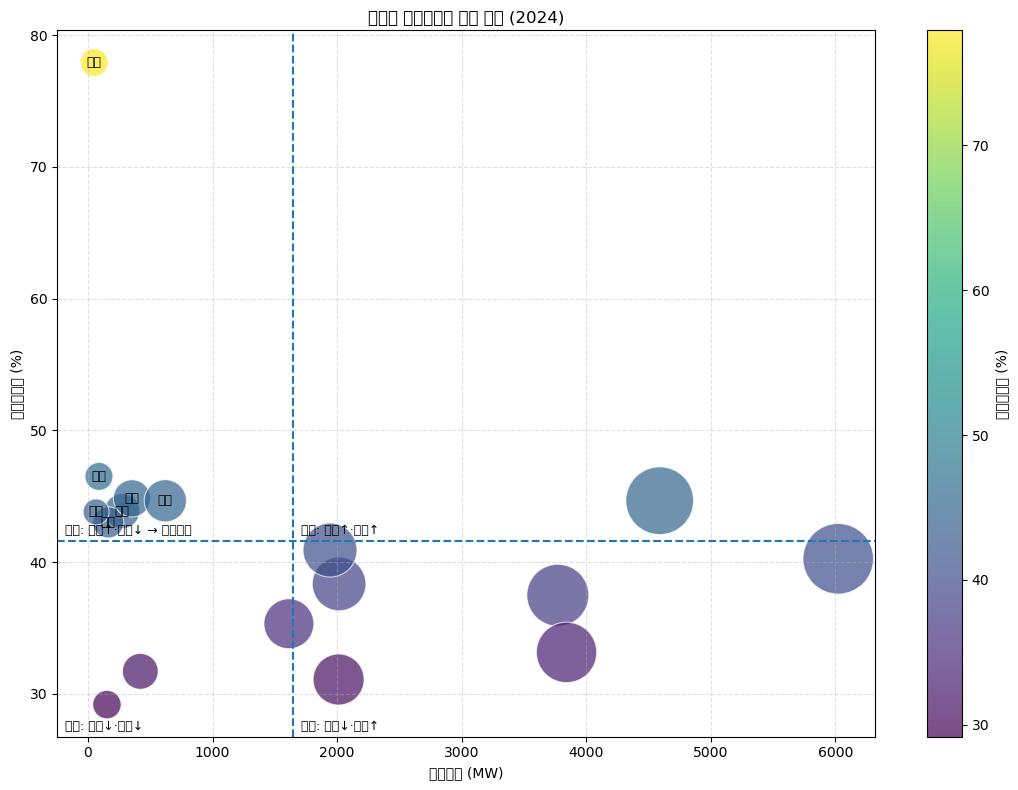

In [3]:
import numpy as np
import plotly.graph_objects as go

# 0) 합친 데이터프레임: merged (컬럼: 연도, 지역, 설비용량(MW), 발전량(MWh), 설비이용률(%))

# 1) 2024년만 필터링 + 안전 전처리
df = merged[merged["연도"] == 2024].copy()

# 숫자형 강제(혹시 문자열/콤마가 섞여 있을 수 있으므로)
for col in ["설비용량(MW)", "발전량(MWh)", "설비이용률(%)"]:
    df[col] = (
        df[col].astype(str).str.replace(",", "", regex=False).str.strip()
        .replace({"": np.nan, "-": np.nan})
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 0 또는 NaN 제거 (분모/분자 문제 방지)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["설비용량(MW)", "발전량(MWh)"])
df = df[df["설비용량(MW)"] > 0]

# 2) 설비이용률이 비어 있으면 재계산 (있으면 그대로 사용)
if df["설비이용률(%)"].isna().any():
    df.loc[df["설비이용률(%)"].isna(), "설비이용률(%)"] = (
        df["발전량(MWh)"] / (df["설비용량(MW)"] * 8760) * 100
    )

# 3) 평균선/라벨 등 보조 계산
mean_cap = df["설비용량(MW)"].mean()
mean_cf  = df["설비이용률(%)"].mean()

# 좌상(효율↑, 용량↓) = 투자유망 가이드 마스크
mask_opportunity = (df["설비이용률(%)"] >= mean_cf) & (df["설비용량(MW)"] < mean_cap)

# 버블 크기(발전량 면적 비례, sqrt 스케일)
mwh = df["발전량(MWh)"].clip(lower=0)
size_px = (np.sqrt(mwh / mwh.max()) * 60) + 12   # 필요 시 60/12 조정

# 4) Plotly 버블차트
xmin, xmax = float(df["설비용량(MW)"].min()), float(df["설비용량(MW)"].max())
ymin, ymax = float(df["설비이용률(%)"].min()), float(df["설비이용률(%)"].max())

fig = go.Figure()

# 버블
fig.add_trace(go.Scatter(
    x=df["설비용량(MW)"],
    y=df["설비이용률(%)"],
    mode="markers",
    marker=dict(
        size=size_px,
        color=df["설비이용률(%)"],      # 색상 = 이용률
        colorscale="Viridis",
        colorbar=dict(title="설비이용률 (%)"),
        line=dict(color="white", width=0.8),
        opacity=0.7,
        sizemode="diameter",
    ),
    text=df["지역"],
    hovertemplate=(
        "<b>%{text}</b><br>" +
        "설비용량: %{x:.0f} MW<br>" +
        "설비이용률: %{y:.2f} %<br>" +
        "발전량: %{customdata:,} MWh<extra></extra>"
    ),
    customdata=np.array(df["발전량(MWh)"]),
    name="지역"
))

# 평균선
fig.add_hline(y=float(mean_cf),  line_dash="dash", annotation_text="평균 이용률",   annotation_position="top left")
fig.add_vline(x=float(mean_cap), line_dash="dash", annotation_text="평균 설비용량", annotation_position="top left")

# 좌상 사분면(투자유망) 라벨
for _, r in df[mask_opportunity].iterrows():
    fig.add_annotation(
        x=float(r["설비용량(MW)"]), y=float(r["설비이용률(%)"]),
        text=str(r["지역"]), showarrow=False, font=dict(size=11)
    )

# 사분면 가이드 텍스트
dx, dy = xmax - xmin, ymax - ymin
fig.add_annotation(x=xmin + dx*0.01, y=mean_cf + dy*0.02, text="좌상: 효율↑·용량↓ → 투자유망", showarrow=False, font=dict(size=10), xanchor="left")
fig.add_annotation(x=xmin + dx*0.01, y=ymin + dy*0.02, text="좌하: 효율↓·용량↓", showarrow=False, font=dict(size=10), xanchor="left")
fig.add_annotation(x=mean_cap + dx*0.01, y=mean_cf + dy*0.02, text="우상: 효율↑·용량↑", showarrow=False, font=dict(size=10), xanchor="left")
fig.add_annotation(x=mean_cap + dx*0.01, y=ymin + dy*0.02, text="우하: 효율↓·용량↑", showarrow=False, font=dict(size=10), xanchor="left")

fig.update_layout(
    title="지역별 설비이용률 버블 차트 (2024, 합친 데이터 사용)",
    xaxis_title="설비용량 (MW)",
    yaxis_title="설비이용률 (%)",
    template="plotly_white",
    hovermode="closest",
)

plt.tight_layout()
plt.show()


In [ ]:
# 데이터 불러오기
df = pd.read_csv("")
df = pd.read_excel("")

# 연도별 전국 평균 설비 이용률 추세
plt.figure(figsize=()) # widths, height 설정
yearly_avg = df.groupby("연도")["설비이용률(%)"].mean().reset_index()
sns.lineplot(data=yearly_avg, x="연도", y="설비이용률(%)", marker="o")
plt.title("연도별 전국 평균 설비 이용률 추세", fontsize=14)
plt.ylabel("설비 이용률 (%)")
plt.grid(True, alpha=0.3)
plt.show()

# 지역별 설비 이용률 순위(평균)
plt.figure(figsize=()) # widths, height 살정
region_avg = df.groupby("지역")["설비이용률(%)"].mean().reset_index()
sns.barplot(data=region_avg.sort_values("설비이용률(%)", ascending=False),
            x="설비이용률(%)", y="지역")
plt.title("지역별 평균 설비 이용률 순위", fontsize=14)
plt.xlabel("평균 설비 이용률 (%)")
plt.show()
